
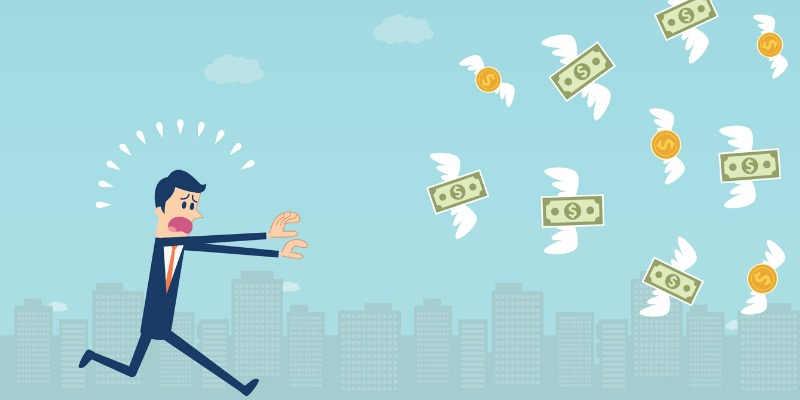




# Business Understanding

A Local Casino has found many people bet on the over/total score every time the home team is the favorite team to win 

Typically a Casino, wants the bet count to be even (same amount of people bet for both outcomes) so they can take a small percentage back or have most people be on the losing end of the bet so the casino would be able to pay itself from the losing betters.

Many people have noticed when they bet in agreement with the 'over'/'total score and the home team is the favorite to win they come out on top. 

This causes the Casino to decrease in revenue, as everyone is placing a bet on the same things and most of the time they are winning which causes the casino to have to pay the customers directly and not from the bets of other people who have lost. 

The Casino has contacted me to ensure that there is no advantage in betting the 'over' when the home team is favorited. 




### The Nuts and Bolts of an Over_Under Bet
When looking at listed odds for a game, this is represented as total, over/under, and sometimes shortened as O/U. There will be a number listed, something like 155 for a college basketball game, 8 for a baseball game, or 47 for an NFL game. That number is the line for over/under bets, called the total.

A bet on the over means you think both teams will combine to score more goals, points, or runs than the total listed. Conversely, an under bet means you think there will be less than the total listed. It’s that simple.
 
 
[More Information About Sports Betting](https://theathletic.com/2523188/2022/01/25/what-is-the-over-under-in-sports-betting/#:~:text=A%20bet%20on%20the%20over,It's%20that%20simple.)


### Why is this important? 
 An estimated 45.2 million Americans plan to wager on the NFL season in some form, up 36% from last year, according to research from the American Gaming Association. At least 

12 billion will be bet on the NFL this season, according to sports betting market tracker PlayUSA.

[NFL BETTING STATICS](https://www.cnbc.com/2021/09/09/more-americans-will-wager-on-the-nfl-as-the-league-embraces-betting.html)

As the bets increase there is more potential for revenue in the point spread stye of betting. 

______________________________________________________________________________________________________________________


The question to be answered is there no statistical advantage to betting the over when the home team is the favorite to win the game

Null Hypothesis:

The over is not more likely if the home team is the favorite team to win

Alternative: Hypothesis

the over is more likely to get achived if the home team is the favorite to win 

Metrics used To compare models we will focus on 1 major metrics:
F1-Score
which takes both precision and recall into account to ultimately measure the accuracy of the model. The reason this metric was choosen is because while true negatives are often less important to what ever problem you’re trying to solve especially in a business setting. 

The F1 score tries to take this into account, giving more weight to false negatives and false positives while not letting large numbers of true negatives influence your score. 
 
 great article going into the metrics found [here:](https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021)


### Objective
We Want to create a model that correctly predicts that the  point spread favorited team does not have the advantage in point spread betting. 
Allowing the local casino to increase the bet prices on point spread favorites which increases their revenue. 

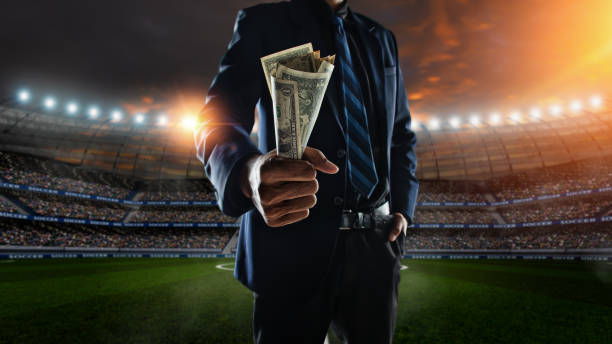

### Data Understanding and Preparation
For this analysis we will gain a better understanding of our dataset. Being that this is a dataset of Nfl scores, betting odds, and NFL teams data, it will be incredibly useful in the development of a sports betting tool . Utilizing the data resources and preparation it was discovered that The useful information was in more than one data set that would eventually have to be merged or alienated altogether. 

### The Data 

The data comes from a dataset that can be found [here:](https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data)

##### Teams
The Data Set Entitled 'Teams' contains columns consisting of 

- team_name	-Names of NFL Teams 
- team_name_short	-Team Names without the City/State
- team_id - Abreviation of NFL Teams
- team_id_pfr	-Abreviation of NFL Teams
- team_conference	-Conference that the NFL Team is in 
- team_division	- Division That the NFL Team is in 
- team_conference_pre2002 - Conference Prior to 2002 
- team_division_pre2002- Divisions Prior to 2002


##### Stadiums
The Data set entitled 'Stadiums' consists of a bunch of stadium inforatio about where the NFL team plays
I will not be utilizing this data set initailly as I don't believe it plays a huge role in the point_spread target 

- stadium_name	
- stadium_location	
- stadium_open	
- stadium_close	
- stadium_type	
- stadium_address	
- stadium_weather_station_code	
- stadium_weather_type	
- stadium_capacity	
- stadium_surface		
- LATITUDE	
- LONGITUDE	
- ELEVATION 

##### Spread 
The Data set entitled Spread will be my priority data set. The Target variabl is located on this data set as well as key informatioin from the previously mentioned data sets are on this data set as well. 

- schedule_date	
- schedule_season	schedule_week	
- schedule_playoff	
- team_home	
- score_home	
- score_away	
- team_away	
- team_favorite_id	
- spread_favorite	
- over_under_line	
- stadium	stadium_neutral	
- weather_temperature	weather_wind_mph	
- weather_humidity	
- weather_detail

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import datetime
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)
    import sklearn

# required machine learning packages
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.metrics import brier_score_loss, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.calibration import CalibratedClassifierCV as CCV

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Poisson
from statsmodels.api import OLS
from sklearn.metrics import classification_report
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
spread = pd.read_csv('data/spreadspoke_scores.csv')
spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


In [3]:
stadiums = pd.read_csv('data/nfl_stadiums.csv')
stadiums

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


In [4]:
teams = pd.read_csv('data/nfl_teams.csv')
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


### Stadiums 

### I need  nothing from this particular CSV to help prdict my over and under variable 

In [5]:
#stadiums.info()

## Spread 
There is a lot of EDA done Prior in which I expain in each cell


 Spread_favorite Target Variable #2
 
 Over_under_line target
 
 Stadium Dropped 
 
Stadium neutal  

All Weather ccolumns will be dropped 

 Schedule_dropped below 2013. completed.

In [6]:
#dropping seasons that are before 2012 as I don't know if I need more than 10 years worth of data to explore a prediciton for an over under line

spread.drop(index = spread[spread['schedule_season'] <= 2012].index, inplace = True)
spread = spread.replace(r'^\s*$', np.nan, regex=True)

spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,9/5/2013,2013,1,False,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
10810,9/8/2013,2013,1,False,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
10811,9/8/2013,2013,1,False,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,45,Bank of America Stadium,False,87.0,7.0,48.0,NaN
10812,9/8/2013,2013,1,False,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,42,Soldier Field,False,77.0,13.0,79.0,NaN
10813,9/8/2013,2013,1,False,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


In [7]:
#striping any additional white space in team home
#they will all eventually be away teams so I didn't do that side. 
spread['team_home'].str.strip()

10809          Denver Broncos
10810           Buffalo Bills
10811       Carolina Panthers
10812           Chicago Bears
10813        Cleveland Browns
                 ...         
13227      Kansas City Chiefs
13228    Tampa Bay Buccaneers
13229      Kansas City Chiefs
13230        Los Angeles Rams
13231        Los Angeles Rams
Name: team_home, Length: 2423, dtype: object

In [8]:
spread

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10809,9/5/2013,2013,1,False,Denver Broncos,49.0,27.0,Baltimore Ravens,DEN,-7.5,49.5,Sports Authority Field at Mile High,False,83.0,7.0,30.0,NaN
10810,9/8/2013,2013,1,False,Buffalo Bills,21.0,23.0,New England Patriots,NE,-10.5,51.5,Ralph Wilson Stadium,False,65.0,6.0,55.0,NaN
10811,9/8/2013,2013,1,False,Carolina Panthers,7.0,12.0,Seattle Seahawks,SEA,-3.5,45,Bank of America Stadium,False,87.0,7.0,48.0,NaN
10812,9/8/2013,2013,1,False,Chicago Bears,24.0,21.0,Cincinnati Bengals,CHI,-3.0,42,Soldier Field,False,77.0,13.0,79.0,NaN
10813,9/8/2013,2013,1,False,Cleveland Browns,10.0,23.0,Miami Dolphins,CLE,-2.5,40.5,FirstEnergy Stadium,False,72.0,16.0,80.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


<AxesSubplot:>

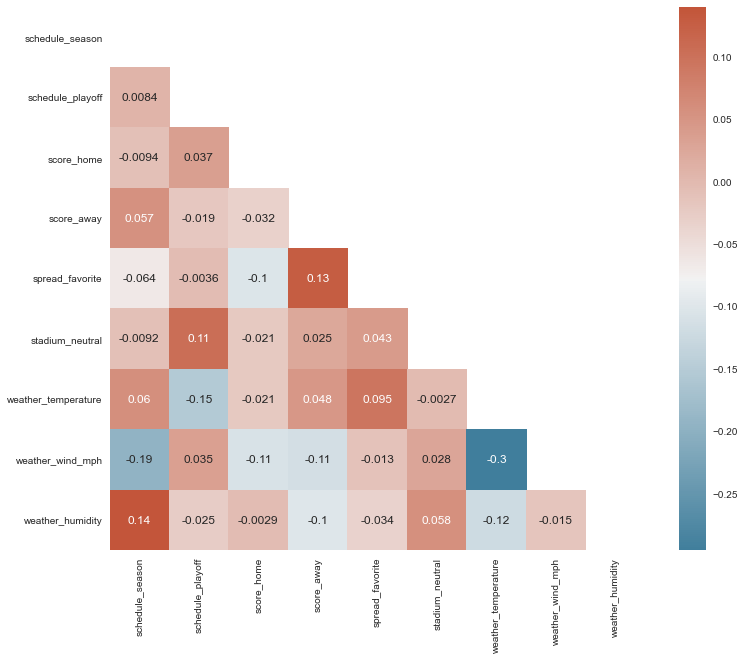

In [9]:
corr = spread.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [10]:
#the datatype of the over_under_line was incorrect
spread.reset_index(drop=True, inplace=True)
spread['over_under_line'] = spread.over_under_line.astype(float)


## Teams 

### I will be keeping team_division as divisiional games actually have a significant dilema on spread. 

In [11]:
teams

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [12]:
teams.drop(columns = ['team_name_short','team_id_pfr','team_conference','team_conference_pre2002','team_division_pre2002'], inplace = True)

In [13]:
#I have to drop the teams who haven't been teams within the last 10 years of the NFL 

teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilerss'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Houston Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Los Angeles Raiders'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Tennessee Oilers'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Phoenix Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'St. Louis Cardinals'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Boston Patriots'].index, inplace = True)
teams.drop(index=teams[teams['team_name'] == 'Baltimore Colts'].index, inplace = True)
teams.reset_index(drop=True, inplace=True)
teams['team_name'].str.strip()
teams

,team_name,team_id,team_division
0,Arizona Cardinals,ARI,NFC West
1,Atlanta Falcons,ATL,NFC South
2,Baltimore Ravens,BAL,AFC North
3,Buffalo Bills,BUF,AFC East
4,Carolina Panthers,CAR,NFC South
5,Chicago Bears,CHI,NFC North
6,Cincinnati Bengals,CIN,AFC North
7,Cleveland Browns,CLE,AFC North
8,Dallas Cowboys,DAL,NFC East
9,Denver Broncos,DEN,AFC West


## I want to add individual column of conference to the spread and increase the weight of these games... 

In [14]:
# mapping team_id to the correct teams
spread['team_home'] = spread.team_home.map(teams.set_index('team_name')['team_id'].to_dict())
spread['team_away'] = spread.team_away.map(teams.set_index('team_name')['team_id'].to_dict())

In [15]:
# creating home favorite and away favorite columns (fill na with 0's)
#Instead of one hot encoding or get dummies 
spread.loc[spread.team_favorite_id == spread.team_home, 'home_favorite'] = 1.0
spread.loc[spread.team_favorite_id == spread.team_away, 'away_favorite'] = 1.0
spread.home_favorite.fillna(0.0, inplace=True)
spread.away_favorite.fillna(0.0, inplace=True)

In [16]:
# creating over / under column if the team was over it will get a one and under wil be a 0
#Feature Engineering Instead of one hotEncoding!!!!
spread.loc[((spread.score_home + spread.score_away) > spread.over_under_line), 'over'] = 1
spread.over.fillna(0, inplace=True)


In [17]:
# removing extra columns that aren't necessary for analysis
spread = spread[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite',
       'over_under_line', 'weather_temperature',
       'weather_wind_mph', 'score_home', 'score_away',
       'stadium_neutral', 'home_favorite', 'away_favorite',
       'over']]

In [18]:
spread

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,weather_temperature,weather_wind_mph,score_home,score_away,stadium_neutral,home_favorite,away_favorite,over
0,9/5/2013,2013,1,DEN,BAL,DEN,-7.5,49.5,83.0,7.0,49.0,27.0,False,1.0,0.0,1.0
1,9/8/2013,2013,1,BUF,NE,NE,-10.5,51.5,65.0,6.0,21.0,23.0,False,0.0,1.0,0.0
2,9/8/2013,2013,1,CAR,SEA,SEA,-3.5,45.0,87.0,7.0,7.0,12.0,False,0.0,1.0,0.0
3,9/8/2013,2013,1,CHI,CIN,CHI,-3.0,42.0,77.0,13.0,24.0,21.0,False,1.0,0.0,1.0
4,9/8/2013,2013,1,CLE,MIA,CLE,-2.5,40.5,72.0,16.0,10.0,23.0,False,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,1/23/2022,2021,Division,KC,BUF,KC,-2.5,54.0,35.0,6.0,42.0,36.0,False,1.0,0.0,1.0
2419,1/23/2022,2021,Division,TB,LAR,TB,-3.0,48.0,50.0,11.0,27.0,30.0,False,1.0,0.0,1.0
2420,1/30/2022,2021,Conference,KC,CIN,KC,-7.0,54.5,41.0,4.0,24.0,27.0,False,1.0,0.0,0.0
2421,1/30/2022,2021,Conference,LAR,SF,LAR,-3.5,46.0,72.0,0.0,20.0,17.0,False,1.0,0.0,0.0


In [19]:
spread['result'] = (spread.score_home > spread.score_away).astype(int)

<ipython-input-19-725b9941b1d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread['result'] = (spread.score_home > spread.score_away).astype(int)


In [20]:
# some percentages to take into consideration when betting
home_win = "{:.2f}".format((sum((spread.result == 1) & (spread.stadium_neutral == 0)) / len(spread)) * 100)
away_win = "{:.2f}".format((sum((spread.result == 0) & (spread.stadium_neutral == 0)) / len(spread)) * 100)
under_line = "{:.2f}".format((sum((spread.score_home + spread.score_away) < spread.over_under_line.astype(float)) / len(spread)) * 100)
over_line = "{:.2f}".format((sum((spread.score_home + spread.score_away) > spread.over_under_line.astype(float)) / len(spread)) * 100)

favored = "{:.2f}".format((sum(((spread.home_favorite == 1) & (spread.result == 1)) | ((spread.away_favorite == 1) & (spread.result == 0)))
                           / len(spread)) * 100)

cover = "{:.2f}".format((sum(((spread.home_favorite == 1) & ((spread.score_away - spread.score_home) < spread.spread_favorite.astype(float))) | 
                             ((spread.away_favorite == 1) & ((spread.score_home - spread.score_away) < spread.spread_favorite.astype(float)))) 
                         / len(spread)) * 100)

ats = "{:.2f}".format((sum(((spread.home_favorite == 1) & ((spread.score_away - spread.score_home) > spread.spread_favorite.astype(float))) | 
                           ((spread.away_favorite == 1) & ((spread.score_home - spread.score_away) > spread.spread_favorite.astype(float)))) 
                       / len(spread)) * 100)

In [21]:
# print all percentages
print("Number of Games: " + str(len(spread)))
print("Home Straight Up Win Percentage: " + home_win + "%")
print("Away Straight Up Win Percentage: " + away_win + "%")
print("Under Percentage: " + under_line + "%")
print("Over Percentage: " + over_line + "%")
print("Favored Win Percentage: " + favored + "%")
print("Cover The Spread Percentage: " + cover + "%")
print("Against The Spread Percentage: " + ats + "%")

Number of Games: 2423
Home Straight Up Win Percentage: 54.77%
Away Straight Up Win Percentage: 43.66%
Under Percentage: 50.64%
Over Percentage: 47.79%
Favored Win Percentage: 65.66%
Cover The Spread Percentage: 46.47%
Against The Spread Percentage: 50.06%


In [22]:

# creating 2 separate dataframes with the home teams / scores and the away teams / scores
score = spread.groupby(['schedule_season', 'schedule_week', 'team_home']).mean()[['score_home', 'score_away']].reset_index()
aw_score = spread.groupby(['schedule_season', 'schedule_week', 'team_away']).mean()[['score_home', 'score_away']].reset_index()

# create total pts column
score['point_diff'] = score.score_home - score.score_away
aw_score['point_diff'] = aw_score.score_away - aw_score.score_home

# append the two dataframes
score = score.append(aw_score, ignore_index=True, sort=True)

# fill null values
score.team_home.fillna(score.team_away, inplace=True)

# sort by season and week 
score.sort_values(['schedule_season', 'schedule_week'], ascending = [True, True], inplace=True)

# removing unneeded columns & changing column name 
score = score[['schedule_season', 'schedule_week', 'team_home', 'point_diff']]
score.rename(columns={'team_home' : 'team'}, inplace=True)
 

In [23]:
# dictionary of dataframes - separate dataframe for each team
tm_dict = {}
for key in score.team.unique():
    tm_dict[key] = score[score.team == key].reset_index(drop=True)

In [24]:
# dataframe to populate
pts_diff = pd.DataFrame()

# for loop to create a rolling average of the previous games for each season
for yr in score.schedule_season.unique():
    for tm in score.team.unique():
        data = tm_dict[tm].copy()
        data = data[data.schedule_season == yr]
        
        data.loc[:, 'avg_pts_diff'] = data.point_diff.shift().expanding().mean()
        
        pts_diff = pts_diff.append(data)

In [25]:
# merging to df and changing column names
spread = spread.merge(pts_diff[['schedule_season', 'schedule_week', 'team', 'avg_pts_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_home'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'avg_pts_diff' : 'hm_avg_pts_diff'}, inplace=True)

spread = spread.merge(pts_diff[['schedule_season', 'schedule_week', 'team', 'avg_pts_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_away'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'avg_pts_diff' : 'aw_avg_pts_diff'}, inplace=True)

In [26]:
# average point differential over entire season
total_season = pts_diff.groupby(['schedule_season', 'team']).mean()['point_diff'].reset_index()

In [27]:
# adding schedule week for merge and adding one to the season for prediction
total_season['schedule_week'] = 1
total_season['schedule_season'] += 1

In [28]:
total_season['schedule_week'] = total_season['schedule_week'].astype(str)

In [29]:
# cleaning of columns
spread = spread[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line',
       'weather_temperature', 'weather_wind_mph', 'score_home', 'score_away', 'stadium_neutral', 'home_favorite',
       'away_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff', 'over', 'result']]

In [30]:
#ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat
total_season['schedule_week']= total_season['schedule_week'].astype(str)

In [31]:
# merge to have previous seasons average point differential

spread = spread.merge(total_season[['schedule_season', 'schedule_week', 'team', 'point_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_home'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'point_diff' : 'hm_avg_diff'}, inplace=True)

spread = spread.merge(total_season[['schedule_season', 'schedule_week', 'team', 'point_diff']], 
              left_on=['schedule_season', 'schedule_week', 'team_away'], right_on=['schedule_season', 'schedule_week', 'team'],
              how='left')

spread.rename(columns={'point_diff' : 'aw_avg_diff'}, inplace=True)



### EDA

- Filling of null values. 
- Visualizing the null values
- Seeing if there is any correlation in certain count types 
- Visualizing the home teaam resulting in an over and point difference

In [32]:
# fill null values - filled with the mode
spread.hm_avg_pts_diff.fillna(-1.0, inplace=True)
spread.aw_avg_pts_diff.fillna(3.0,inplace=True)

<AxesSubplot:>

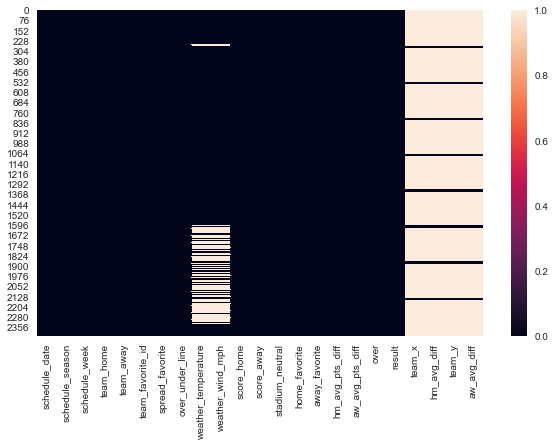

In [33]:
#Any Null Values Left? 
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(spread.isnull())

In [34]:
# removing all rows with columns values
spread = spread.dropna(how='any',axis=1) 
spread

,schedule_date,schedule_season,schedule_week,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium_neutral,home_favorite,away_favorite,hm_avg_pts_diff,aw_avg_pts_diff,over,result
0,9/5/2013,2013,1,DEN,BAL,DEN,-7.5,49.5,False,1.0,0.0,-1.000000,3.000000,1.0,1
1,9/8/2013,2013,1,BUF,NE,NE,-10.5,51.5,False,0.0,1.0,-1.000000,3.000000,0.0,0
2,9/8/2013,2013,1,CAR,SEA,SEA,-3.5,45.0,False,0.0,1.0,-1.000000,3.000000,0.0,0
3,9/8/2013,2013,1,CHI,CIN,CHI,-3.0,42.0,False,1.0,0.0,-1.000000,3.000000,1.0,1
4,9/8/2013,2013,1,CLE,MIA,CLE,-2.5,40.5,False,1.0,0.0,-1.000000,3.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,1/23/2022,2021,Division,KC,BUF,KC,-2.5,54.0,False,1.0,0.0,6.277778,11.411765,1.0,1
2419,1/23/2022,2021,Division,TB,LAR,TB,-3.0,48.0,False,1.0,0.0,9.294118,5.055556,1.0,0
2420,1/30/2022,2021,Conference,KC,CIN,KC,-7.0,54.5,False,1.0,0.0,6.823529,4.941176,0.0,0
2421,1/30/2022,2021,Conference,LAR,SF,LAR,-3.5,46.0,False,1.0,0.0,5.176471,3.647059,0.0,1


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_favorite', ylabel='count'>

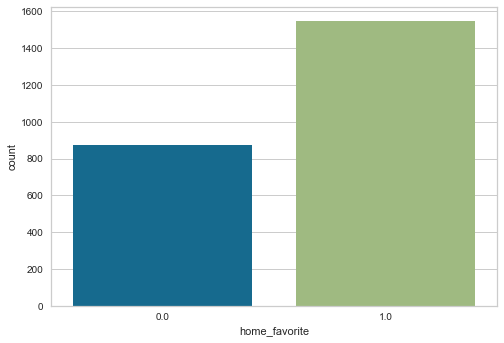

In [35]:
#Seeeing the distrubution of the home team being the favorite to win which is almost twice as much 
sns.countplot(spread['home_favorite'])


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='over', ylabel='count'>

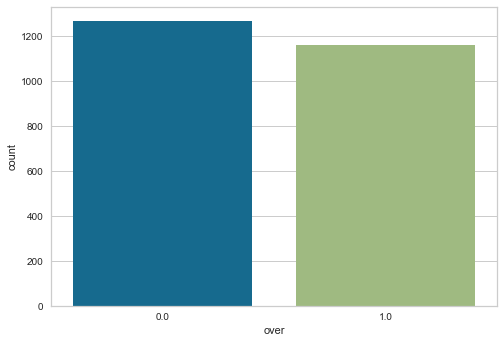

In [36]:
# We want to see if the over (1.0) happens more often than 0.0
sns.countplot(spread['over'])


C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='result', ylabel='count'>

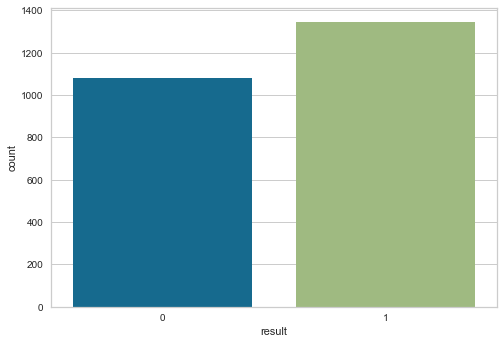

In [37]:
#we are seeing if our home team wins in a general census more than the away team 
sns.countplot(spread['result'])

#### Results 
What these count plots show is that while the home team is favorited quite a bit more in count plot one 
count plot two demonstrates that the over is not reached more than it is reached
However the home team does happen to win more but it appears as if the away team wins a bit more than the times they are favorited. 

In [38]:
spread = spread[['schedule_date', 'schedule_season', 'schedule_week', 'team_home',
       'team_away', 'team_favorite_id', 'spread_favorite', 'over_under_line',
        'stadium_neutral', 'home_favorite',
       'away_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff', 'over', 'result']]

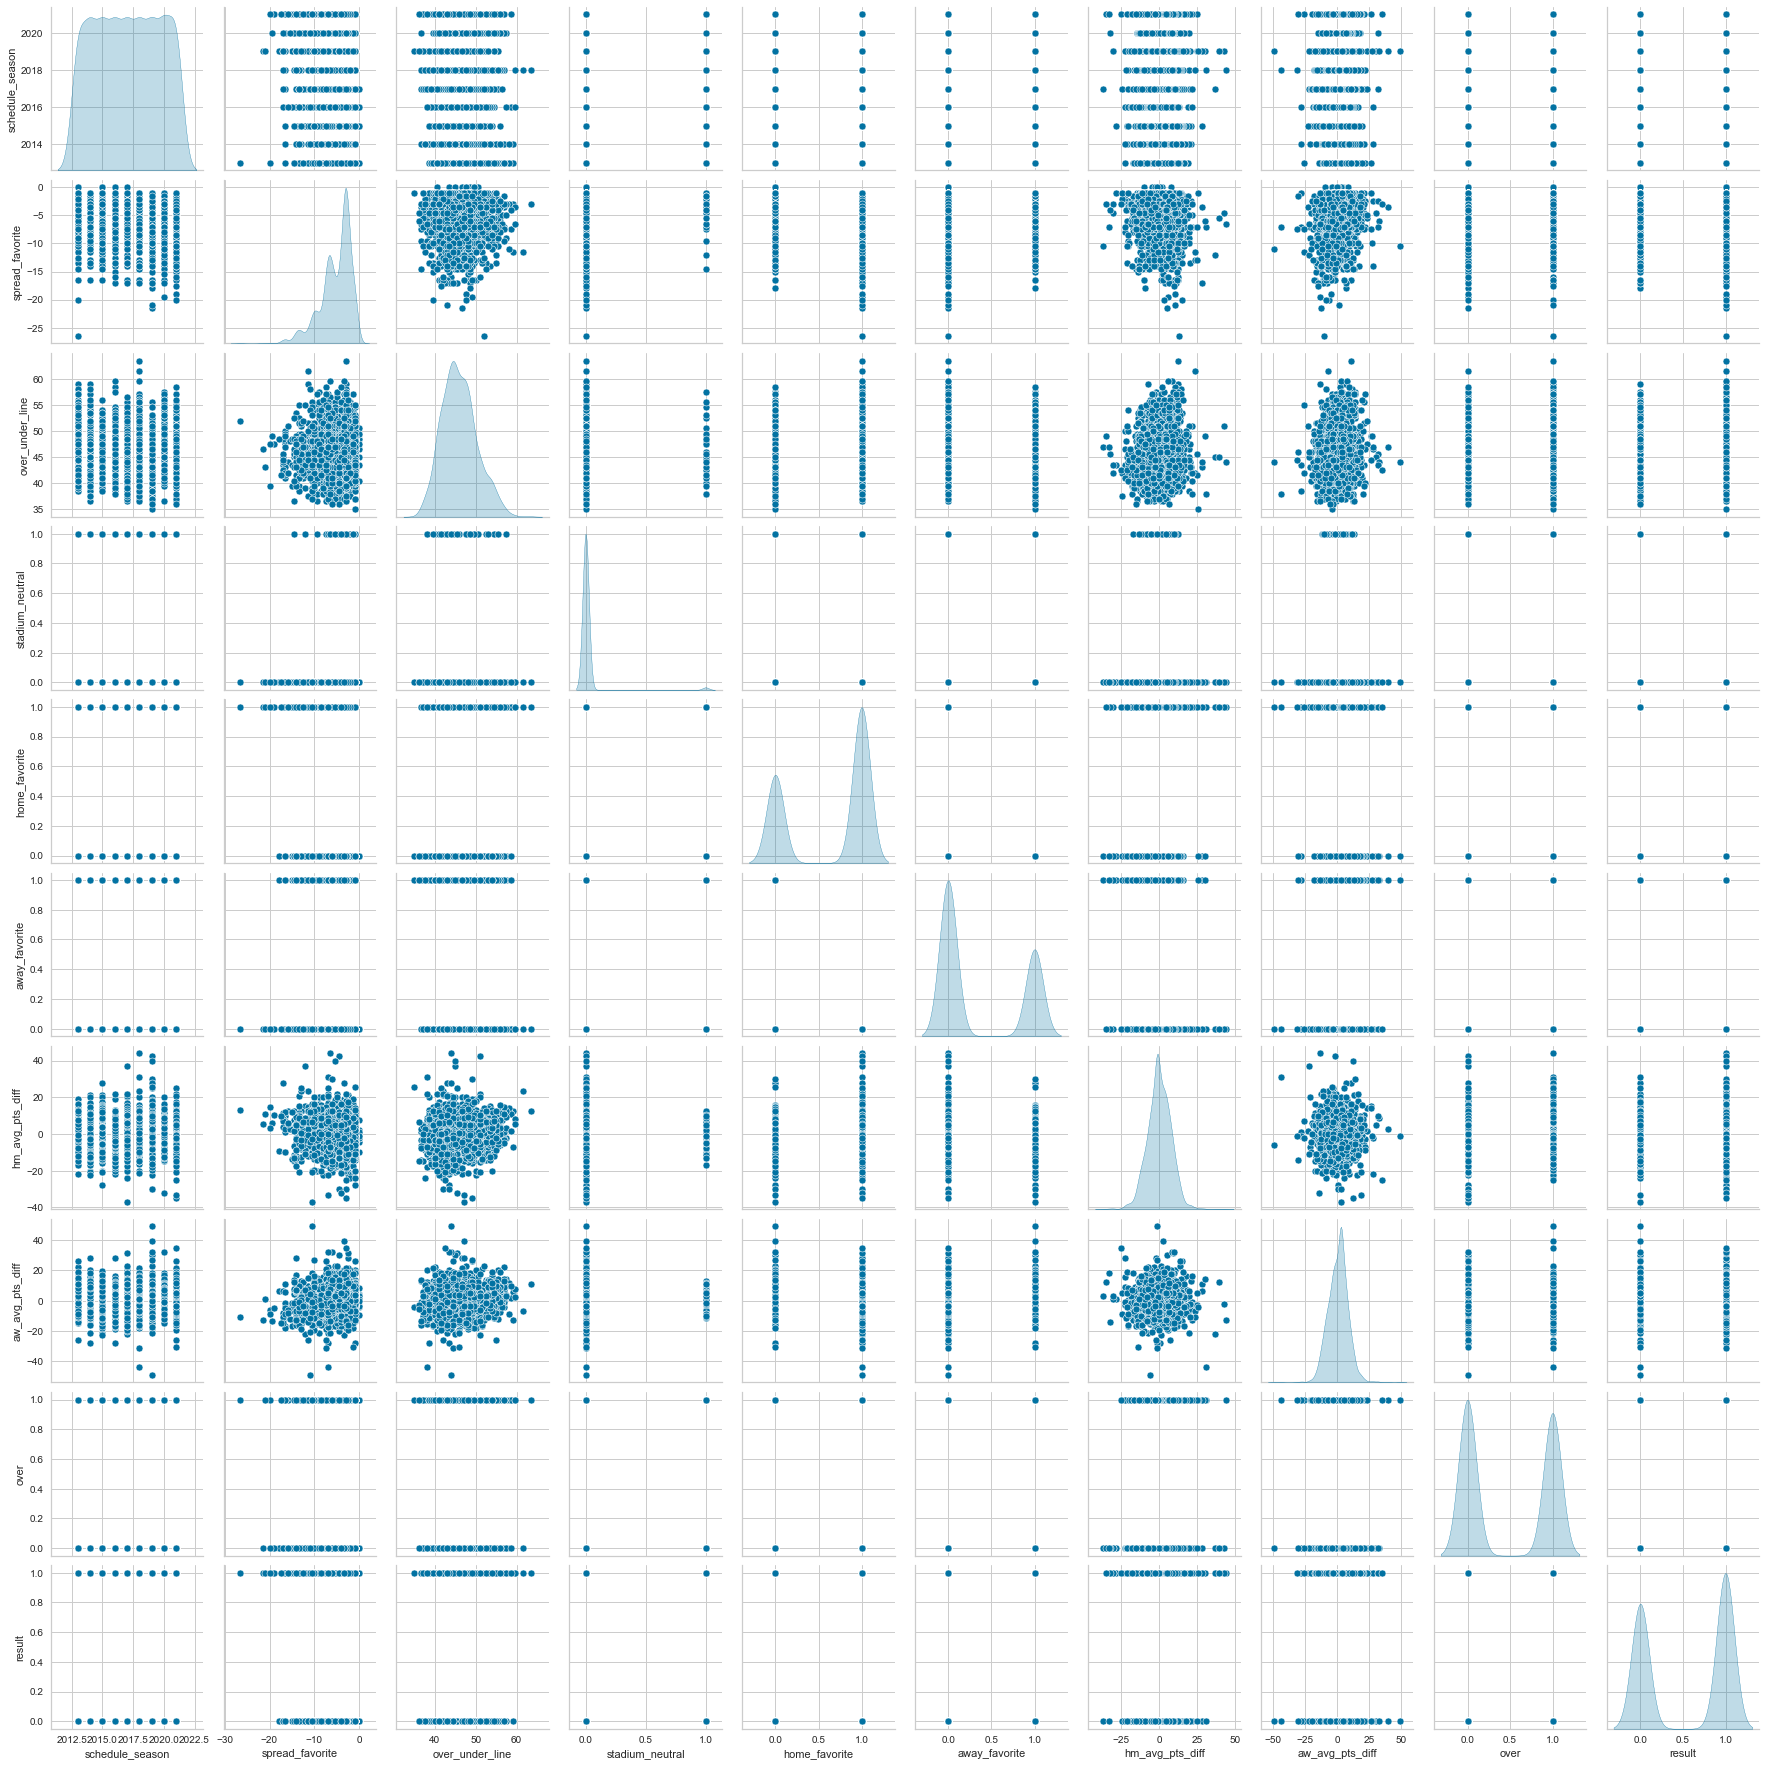

In [39]:
#Exploring Correlation in our data set. 
sns.pairplot(data=spread, diag_kind='kde')


The Below graph demonstrates the distrubution of home team above the over (1.0) and the home team being below the over(0.0)
This graph also demonstrates that some teams score a lot more points. For examample 'NE' rarely loses by more than ten. whereas the 'NYG' team loses consistly what appears to be 10 points

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Home Win Distrubution')

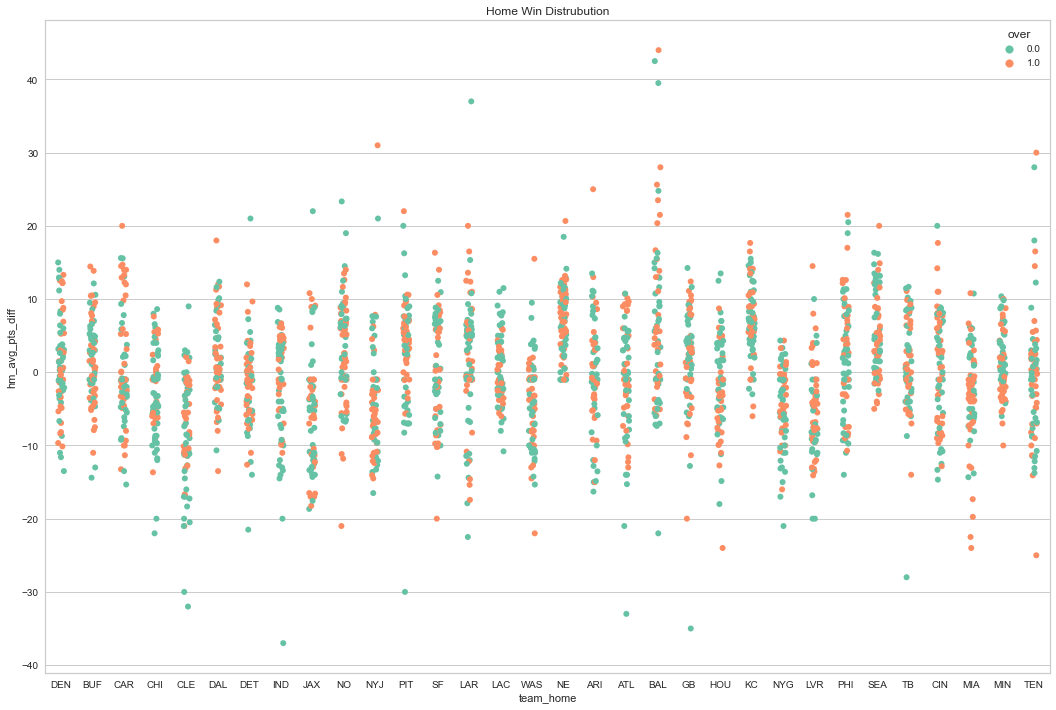

In [40]:
fig_dims = (18, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.stripplot(spread['team_home'], spread['hm_avg_pts_diff'], size = 6, hue = spread['over'], data=spread, palette="Set2").set_title('Home Win Distrubution')

## Modeling
The aims of this modeling process was to maximize 'f1 scores' while minimizing the inputs. 

Decreasing the complexity of the model helps to decrease colinearity and make for a better user experience of our product.

We approach model development iteratively to identify the best features for our use case. Target feature - 'Over' - 

building the models was learned by https://youtu.be/L9BLLWRtnOU




Metrics used To compare models we will focus on 1 major metrics: F1-Score which takes both precision and recall into account to ultimately measure the accuracy of the model. The reason this metric was choosen is because while true negatives are often less important to what ever problem you’re trying to solve especially in a business setting.

The F1 score tries to take this into account, giving more weight to false negatives and false positives while not letting large numbers of true negatives influence your score.

more information found at this [Blog](https://towardsdatascience.com/whats-the-deal-with-accuracy-precision-recall-and-f1-f5d8b4db1021)

In [41]:
spread.describe()

,schedule_season,spread_favorite,over_under_line,home_favorite,away_favorite,hm_avg_pts_diff,aw_avg_pts_diff,over,result
count,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000,2423.000000
mean,2017.032191,-5.325010,45.934379,0.638465,0.357821,0.083655,0.517345,0.477920,0.554684
std,2.596088,3.455289,4.292205,0.480544,0.479458,7.907692,7.845892,0.499615,0.497103
min,2013.000000,-26.500000,35.000000,0.000000,0.000000,-37.000000,-49.000000,0.000000,0.000000
25%,2015.000000,-7.000000,43.000000,0.000000,0.000000,-4.861905,-4.408333,0.000000,0.000000
50%,2017.000000,-4.000000,45.500000,1.000000,0.000000,-0.416667,1.000000,0.000000,1.000000
75%,2019.000000,-3.000000,48.500000,1.000000,1.000000,5.133929,5.408333,1.000000,1.000000
max,2021.000000,0.000000,63.500000,1.000000,1.000000,44.000000,49.000000,1.000000,1.000000


#### First Simple Model

Modeling Process will folow the same process as the baseline model we will just utilize alternative model types. 
As our results progress we will settle the model type to two  and then

- Cross Validate with a strategy 
- Add hyperparameters to our model types 
- Try to prevent over fitting 
- Limit our features 
- try new Scaler as some of our data has outliers 

#### Model Types Used
- Logistic Regrssion (Baseline)
- Decision Tree 
- Random Forest Classifier
- Gradient Boosting 

Each model type choosen has an advantage and disadvantage that I believe from my EDA would be beneficial to my data type

Please check out [Did Someone Say Models:Jalen Charles](https://medium.com/p/c8d2e4137947) to see what the advantages and disadvantages are to each model type 

##### Baseline Model - Logistic Regression

In [42]:
#features possible for model
X = spread[['over_under_line', 'spread_favorite',
        'home_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff','result']]

y = spread['over']

In [43]:
X_train, X_tess, y_train, y_tess = train_test_split(X, y, test_size = .3 ,random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_tess, y_tess, test_size=0.20, random_state=42)

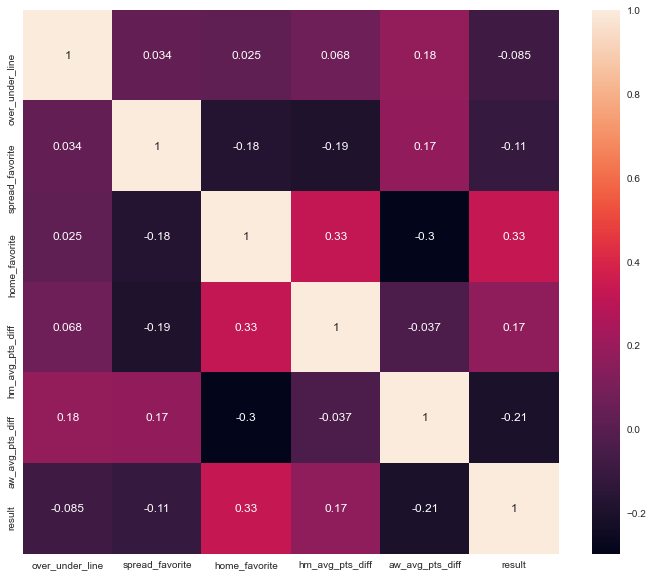

In [44]:
#Pearson Correlation Heatmap. 

plt.figure(figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [45]:
#scaling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_tess)

In [46]:
#institiating the model 
model = LogisticRegression()

#Cross Validation With no strategy

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=4)

cv_scores

array([0.52739726, 0.54482759, 0.52413793, 0.46896552])

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


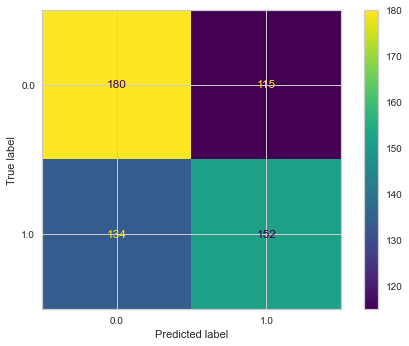

In [47]:
model.fit(X_train_scaled, y_train)
plot_confusion_matrix(model, X_train_scaled, y_train);

In [48]:
#Metrics to evaluate your model 
y_hat = model.predict(X_test_scaled)

model_accuracy = accuracy_score(y_tess, y_hat) 
model_recall = recall_score(y_tess, y_hat)
model_precision = precision_score(y_tess, y_hat) 
model_f1 = f1_score(y_tess, y_hat)

In [49]:
model_f1, model_accuracy, model_recall, model_precision

(0.5560283687943263, 0.5694635488308115, 0.536986301369863, 0.5764705882352941)

As this is only a baseline. I would assume this Logistic Regression did so poorly because a logistic regression model often assumes all predictors are independent of each other and assumes data is free of missing values. 

While data is free of missing values the predictors aren't independent of each other. Its a football game. 

##### Decision Tree

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


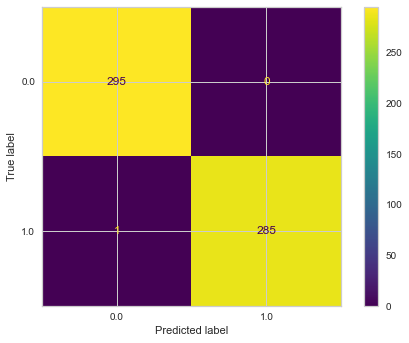

In [50]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
plot_confusion_matrix(dt, X_train_scaled, y_train);

In [51]:
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=4)
cv_scores

array([0.42465753, 0.42758621, 0.42758621, 0.50344828])

In [52]:
#Metrics to evaluate your model 
dt_hat = dt.predict(X_test_scaled)

model_accuracy_dt = accuracy_score(y_tess, dt_hat) 
model_recall_dt = recall_score(y_tess, dt_hat)
model_precision_dt = precision_score(y_tess, dt_hat) 
model_f1_dt = f1_score(y_tess, dt_hat)

In [53]:
model_f1_dt, model_accuracy_dt, model_recall_dt, model_precision_dt

(0.9005524861878452,
 0.9009628610729024,
 0.8931506849315068,
 0.9080779944289693)

- This was a drastic improvement. The F-1 Score is at 89 percent and we haven't even plugged in our hyper parameters or limited any features!! (could be testing with a high bias)

### Random Forrest Classifier 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


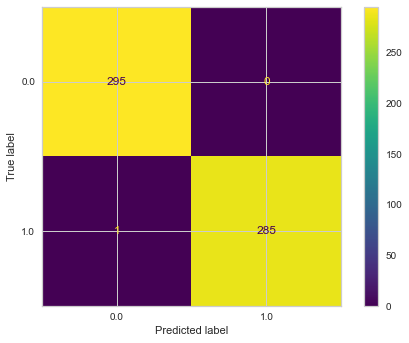

In [54]:
rfc =RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
plot_confusion_matrix(rfc, X_train_scaled, y_train);

In [55]:
cv_scores = cross_val_score(rfc, X_train_scaled, y_train, cv=4)
cv_scores

array([0.46575342, 0.40689655, 0.49655172, 0.46206897])

In [56]:
rfc_hat = rfc.predict(X_test_scaled)

model_accuracy_rfc = accuracy_score(y_tess, rfc_hat) 
model_recall_rfc = recall_score(y_tess, rfc_hat)
model_precision_rfc = precision_score(y_tess, rfc_hat) 
model_f1_rfc = f1_score(y_tess, rfc_hat)

In [57]:
model_f1_rfc, model_accuracy_rfc, model_recall_rfc, model_precision_rfc

(0.9045643153526972,
 0.9050894085281981,
 0.8958904109589041,
 0.9134078212290503)

Because Decision Trees and Random Forest Classifier are very simmilar I would have expected similar results amongst the 
two I did believe RFC would perform a bit better because it has a 

Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.

but we will see what hyperparameters do. 

### Gradient Boost 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


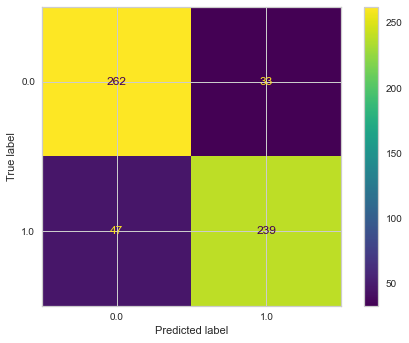

In [58]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)
plot_confusion_matrix(gb, X_train_scaled, y_train);

In [59]:
cv_scores = cross_val_score(gb, X_train_scaled, y_train, cv=4)
cv_scores

array([0.48630137, 0.46896552, 0.50344828, 0.55172414])

In [60]:
gb_hat = gb.predict(X_test_scaled)

model_accuracy_gb = accuracy_score(y_tess, gb_hat) 
model_recall_gb = recall_score(y_tess, gb_hat)
model_precision_gb = precision_score(y_tess, gb_hat) 
model_f1_gb = f1_score(y_tess, gb_hat)

In [61]:
model_f1_gb, model_accuracy_gb, model_recall_gb, model_precision_gb

(0.7921348314606741, 0.796423658872077, 0.7726027397260274, 0.8126801152737753)

This is the most efficient model speed wise. However, I didn't believe it would turn out well without the amount of hyper parameter needed to boost so this makes sense. 

#### Model Tuning 

- K fold will be used this time
- Add hyperparameters to our model types 
- Try to prevent over fitting 
- Limit our features 
- try new Scaler as some of our data has outliers 

We won't be doing any extrme feature slection as the amount of features are not that much and many have a smaller variance. 

In [62]:
#I wanted to add a final spread of the total score as a colum and remove anything that leads to Away teams. 
#as it has such a low varience any ay i don't think it would o any harm.

def finalspread(home, away):
    return home - away

spread['final_spread'] = finalspread(spread['hm_avg_pts_diff'], spread['aw_avg_pts_diff'])
spread.reset_index(drop = True, inplace = True)

In [63]:
Xr = spread[['over_under_line',
        'home_favorite', 'hm_avg_pts_diff','aw_avg_pts_diff','final_spread']]

yr = spread['over']

In [64]:
#Robust Scaler for this as some of the outliers are a bit extreme 
Xr_train, X_r_test, yr_train, y_r_test = train_test_split(Xr, yr, test_size = .3 ,random_state=100)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_r_test, y_r_test, test_size = .2 ,random_state=100)


#I am using a quantile transformer because This method transforms the features to follow a uniform or a normal distribution.
#Therefore, for a given feature, this transformation tends to spread out the most frequent values.
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=10, random_state=40)
X_train_scaled_R = qt.fit_transform(Xr_train)
X_test_scaled_R = qt.transform(X_r_test)

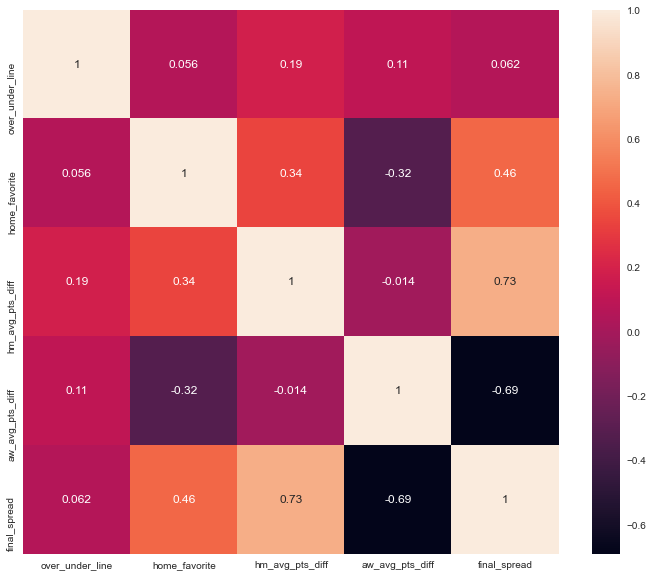

In [65]:
plt.figure(figsize = (12,10))
corr = Xr_train.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Baseline Improvemnt? 
#### Logistic Regression

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


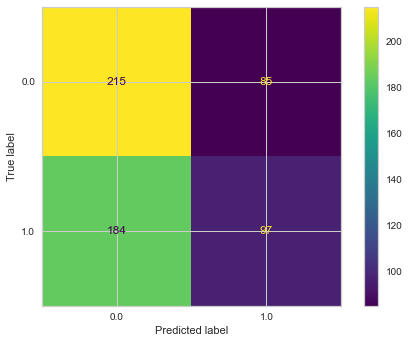

In [66]:
model.fit(X_train_scaled_R, yr_train)
plot_confusion_matrix(model, X_train_scaled_R, yr_train);

In [67]:
#Utiizing K Fold 

kf = KFold(n_splits =4)
i = 1
for train_set, test_set in kf.split(X=Xr):
    print('Iteration ' ,  i)
    print(train_set, " having :", len(train_set))
    print(train_set, " having :", len(test_set))
    print("-------------------")
    
    i += 1

Iteration  1
[ 606  607  608 ... 2420 2421 2422]  having : 1817
[ 606  607  608 ... 2420 2421 2422]  having : 606
-------------------
Iteration  2
[   0    1    2 ... 2420 2421 2422]  having : 1817
[   0    1    2 ... 2420 2421 2422]  having : 606
-------------------
Iteration  3
[   0    1    2 ... 2420 2421 2422]  having : 1817
[   0    1    2 ... 2420 2421 2422]  having : 606
-------------------
Iteration  4
[   0    1    2 ... 1815 1816 1817]  having : 1818
[   0    1    2 ... 1815 1816 1817]  having : 605
-------------------


In [68]:
scores = []
i = 1
for train_set, test_set in kf.split(Xr):
    model.fit(Xr.loc[train_set], yr[train_set])
    sco = model.score(Xr.loc[test_set,],yr[test_set])
    scores.append(sco)
    print('Iteration', i)
    i =+ 1

Iteration 1
Iteration 1
Iteration 1
Iteration 1


In [69]:
scores

[0.5115511551155115, 0.4884488448844885, 0.528052805280528, 0.540495867768595]

In [70]:
#Metrics to evaluate your model 
y_hat2 = model.predict(X_test_scaled_R)

model_accuracy_baseline = accuracy_score(y_r_test, y_hat2) 
model_recall_baseline = recall_score(y_r_test, y_hat2)
model_precision_baseline = precision_score(y_r_test, y_hat2) 
model_f1_baseline = f1_score(y_r_test, y_hat2)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
model_f1_baseline, model_accuracy_baseline, model_recall_baseline, model_precision_baseline

(0.6461824953445066, 0.47730398899587345, 1.0, 0.47730398899587345)

My F1_baseline increased which is our only standard of measurement today from the cross matrix I could tell there would be something that had a 1.0 in it. but overall improvement

##### Decision Tree 

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


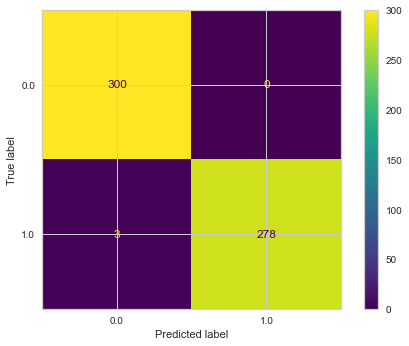

In [72]:
dt2 = DecisionTreeClassifier(random_state = 40)
dt2.fit(X_train_scaled_R, yr_train)
plot_confusion_matrix(dt2, X_train_scaled_R, yr_train);

In [73]:
kf = KFold(n_splits =4)
i = 1
for train_set, test_set in kf.split(X=Xr):
    print('Iteration ' ,  i)
    print(train_set, " having :", len(train_set))
    print(train_set, " having :", len(test_set))
    print("-------------------")
    
    i += 1

Iteration  1
[ 606  607  608 ... 2420 2421 2422]  having : 1817
[ 606  607  608 ... 2420 2421 2422]  having : 606
-------------------
Iteration  2
[   0    1    2 ... 2420 2421 2422]  having : 1817
[   0    1    2 ... 2420 2421 2422]  having : 606
-------------------
Iteration  3
[   0    1    2 ... 2420 2421 2422]  having : 1817
[   0    1    2 ... 2420 2421 2422]  having : 606
-------------------
Iteration  4
[   0    1    2 ... 1815 1816 1817]  having : 1818
[   0    1    2 ... 1815 1816 1817]  having : 605
-------------------


In [74]:
scores = []
i = 1
for train_set, test_set in kf.split(Xr):
    dt2.fit(Xr.loc[train_set], yr[train_set])
    sco = dt2.score(Xr.loc[test_set,],yr[test_set])
    scores.append(sco)
    print('Iteration', i)
    i =+ 1

Iteration 1
Iteration 1
Iteration 1
Iteration 1


In [75]:
scores

[0.4933993399339934, 0.5313531353135313, 0.466996699669967, 0.5305785123966942]

In [76]:
dt = dt2.predict(X_test_scaled_R)

model_accuracy_dt2 = accuracy_score(y_r_test, dt) 
model_recall_dt2 = recall_score(y_r_test, dt)
model_precision_dt2 = precision_score(y_r_test, dt) 
model_f1_dt2 = f1_score(y_r_test,dt)

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
model_f1_dt2, model_accuracy_dt2, model_recall_dt2, model_precision_dt2

(0.0, 0.5226960110041265, 0.0, 0.0)

Scores are pretty similar to the above. despite the random State addition.

C:\Users\metropolitanparkapts\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


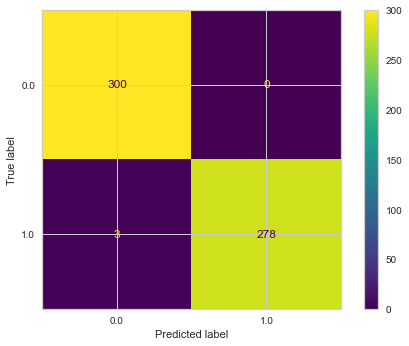

In [78]:
rfc2 = RandomForestClassifier(n_estimators = 300)
rfc2.fit(X_train_scaled_R, yr_train)
plot_confusion_matrix(rfc2, X_train_scaled_R, yr_train);

In [79]:
kf = KFold(n_splits =4)
i = 1
for train_set, test_set in kf.split(X=Xr):
    print('Iteration ' ,  i)
    print(train_set, " having :", len(train_set))
    print(train_set, " having :", len(test_set))
    print("-------------------")
    
    i += 1

Iteration  1
[ 606  607  608 ... 2420 2421 2422]  having : 1817
[ 606  607  608 ... 2420 2421 2422]  having : 606
-------------------
Iteration  2
[   0    1    2 ... 2420 2421 2422]  having : 1817
[   0    1    2 ... 2420 2421 2422]  having : 606
-------------------
Iteration  3
[   0    1    2 ... 2420 2421 2422]  having : 1817
[   0    1    2 ... 2420 2421 2422]  having : 606
-------------------
Iteration  4
[   0    1    2 ... 1815 1816 1817]  having : 1818
[   0    1    2 ... 1815 1816 1817]  having : 605
-------------------


In [80]:
scores = []
i = 1
for train_set, test_set in kf.split(Xr):
    rfc2.fit(Xr.loc[train_set], yr[train_set])
    sco = rfc2.score(Xr.loc[test_set,],yr[test_set])
    scores.append(sco)
    print('Iteration', i)
    i =+ 1

Iteration 1
Iteration 1
Iteration 1
Iteration 1


In [81]:
scores

[0.4933993399339934, 0.5313531353135313, 0.466996699669967, 0.5305785123966942]

In [82]:
rfc2 = rfc2.predict(X_test_scaled_R)

model_accuracy_rfc2 = accuracy_score(y_r_test, rfc2) 
model_recall_rfc2 = recall_score(y_r_test, rfc2)
model_precision_rfc2 = precision_score(y_r_test, rfc2) 
model_f1_rfc2 = f1_score(y_r_test,rfc2)

In [83]:
model_f1_rfc2, model_accuracy_rfc2, model_recall_rfc2, model_precision_rfc2

(0.8879184861717613,
 0.8940852819807428,
 0.8789625360230547,
 0.8970588235294118)

The Model F1 and other statistics look the best when it come to the results of the models being selected. 